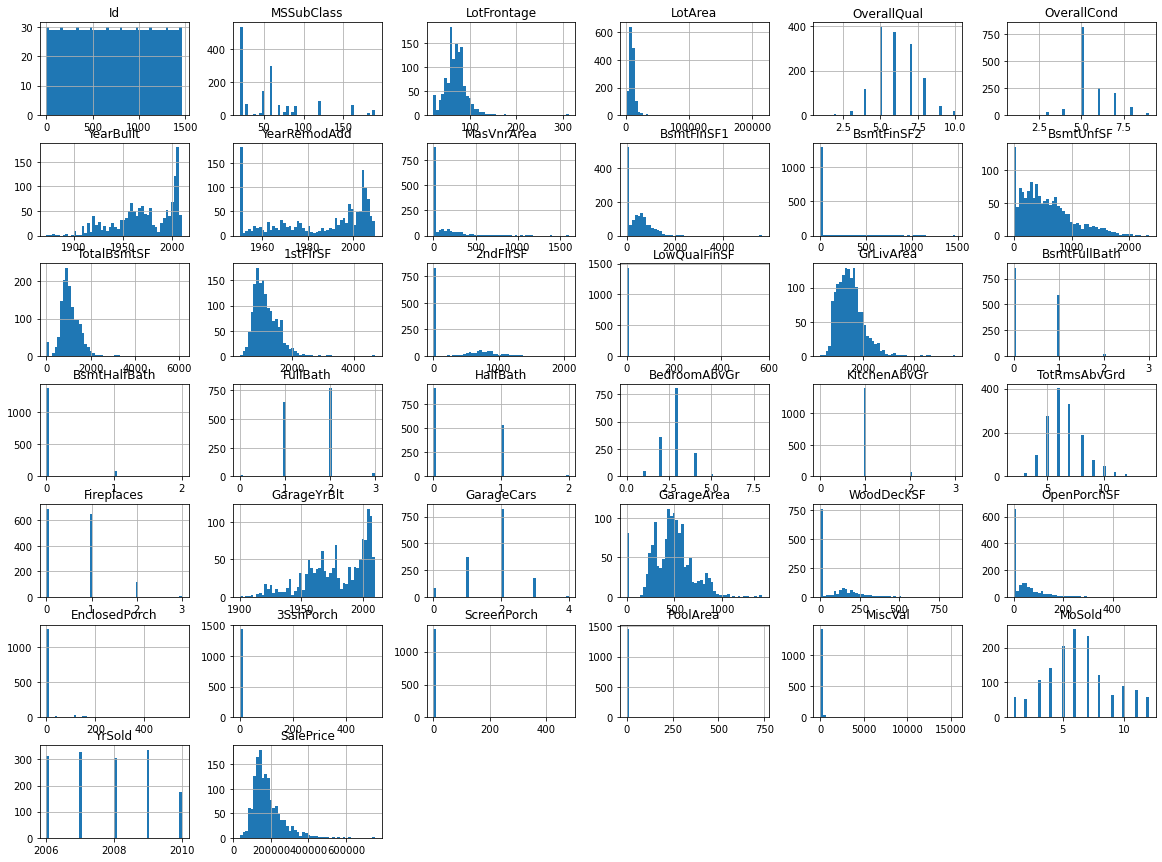

In [213]:
# 1. Load data
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

HOUSE_PRICES_PATH = os.path.join("datasets", "house-prices")
csv_path = os.path.join(HOUSE_PRICES_PATH, "train.csv")
housing = pd.read_csv(csv_path)

housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [214]:
corr_matrix = housing.corr()
corr_matrix["SalePrice"].sort_values(ascending=True)
# OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabe

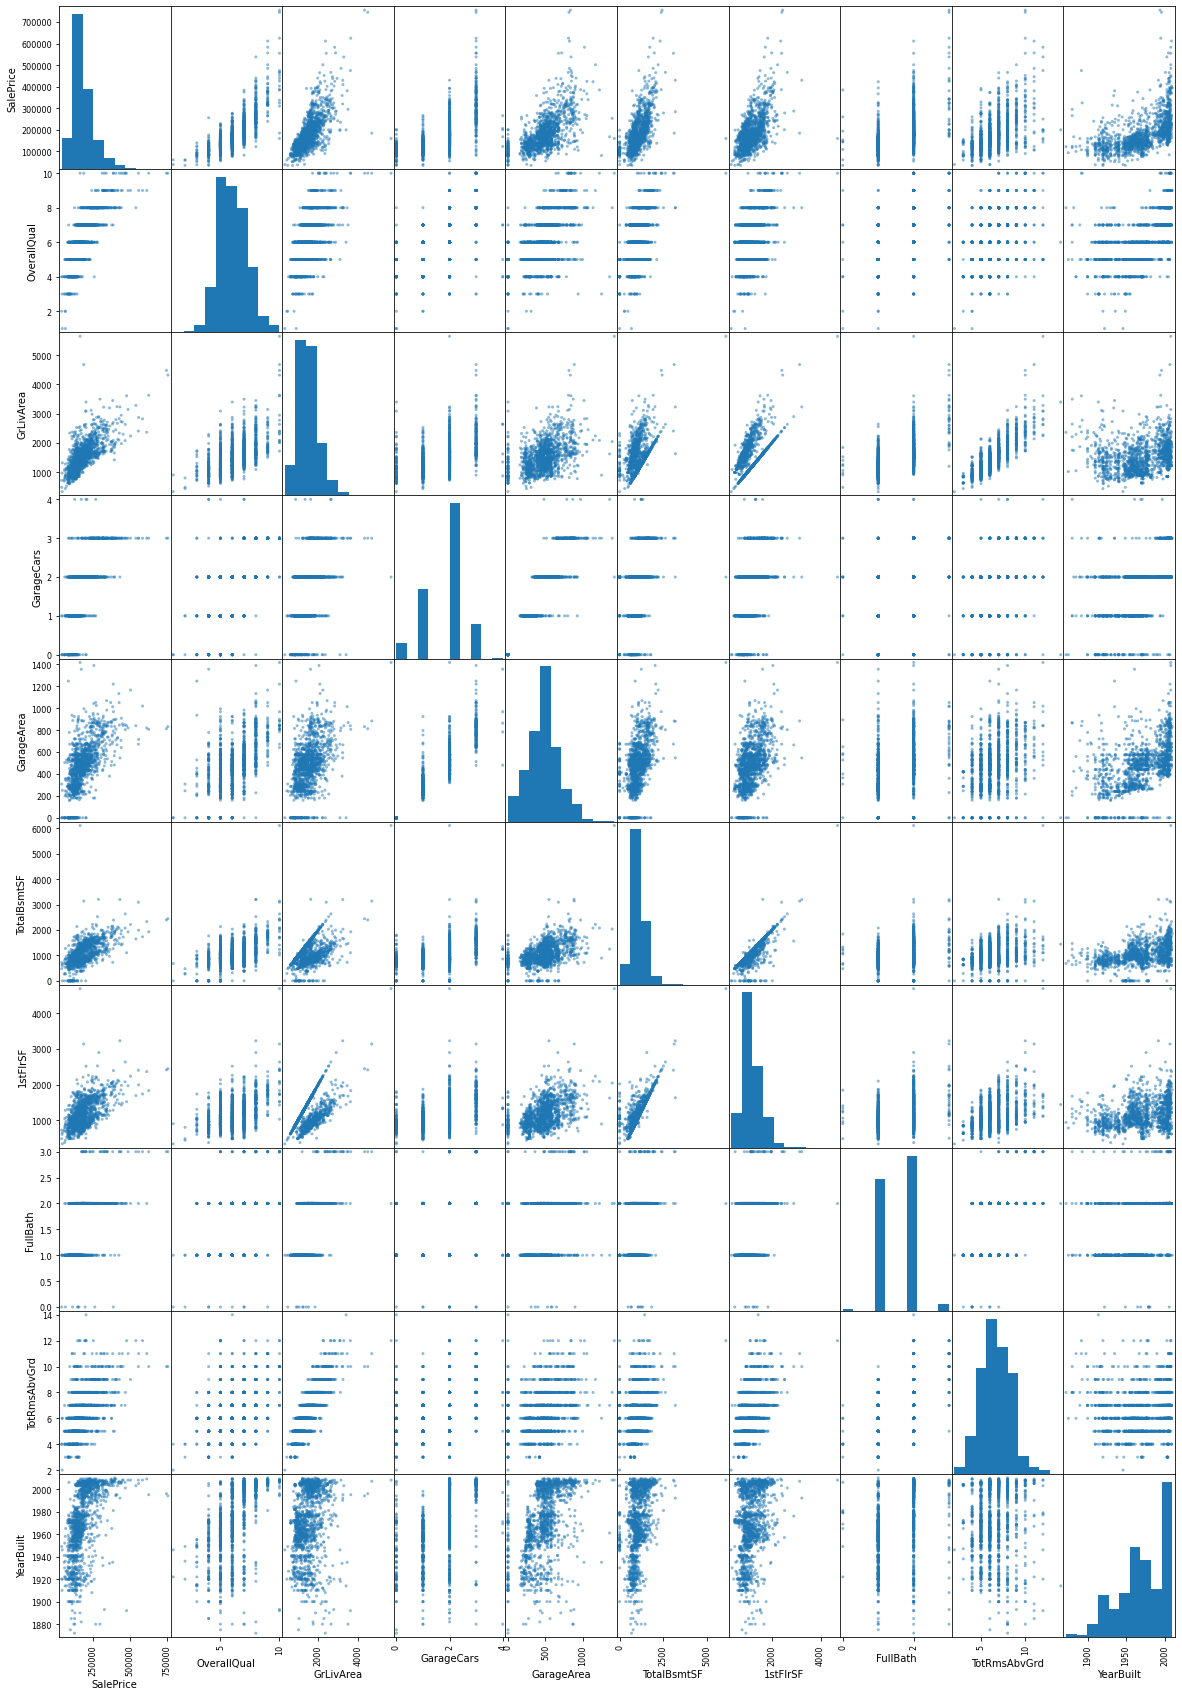

In [215]:
# Interesting attributes with correlation to SalePrice - with SalePrice :)
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]

from pandas.plotting import scatter_matrix

scatter_matrix(housing[attributes], figsize = (20, 30))

In [216]:
housing[attributes].info() # no text values, no empty values to fill

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   GarageCars    1460 non-null   int64
 4   GarageArea    1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   1stFlrSF      1460 non-null   int64
 7   FullBath      1460 non-null   int64
 8   TotRmsAbvGrd  1460 non-null   int64
 9   YearBuilt     1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


In [217]:
# TODO: ideas for new features: total rooms / bedrooms

In [218]:
# train data
X_train = housing[attributes].drop("SalePrice", axis = 1)
Y_train = housing["SalePrice"]

# test data
test_attributes = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]
csv_path = os.path.join(HOUSE_PRICES_PATH, "test.csv")
X_test = pd.read_csv(csv_path)
test_ids = X_test["Id"]
X_test = X_test[test_attributes]
X_test.info(), X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   GarageArea    1458 non-null   float64
 4   TotalBsmtSF   1458 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 102.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   GarageCars    1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF 

(None, None)

In [219]:
# Prepare both data
combine = [X_train, X_test]

train_median_gcars = X_train["GarageCars"].median()
train_median_garea = X_train["GarageArea"].median()
train_median_totalbsmtsf = X_train["TotalBsmtSF"].median()

X_train["GarageCars"].fillna(train_median_gcars, inplace = True)
X_test["GarageCars"].fillna(train_median_gcars, inplace = True)
X_train["GarageArea"].fillna(train_median_garea, inplace = True)
X_test["GarageArea"].fillna(train_median_garea, inplace = True)
X_train["TotalBsmtSF"].fillna(train_median_totalbsmtsf, inplace = True)
X_test["TotalBsmtSF"].fillna(train_median_totalbsmtsf, inplace = True)

attrs = ["GarageCars", "GarageArea", "TotalBsmtSF"]
for dataset in combine:
    dataset["GarageCars"] = dataset["GarageCars"].astype(int)
    dataset["GarageArea"] = dataset["GarageArea"].astype(int)
    dataset["TotalBsmtSF"] = dataset["TotalBsmtSF"].astype(int)

    
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   GarageCars    1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   YearBuilt     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


In [220]:
# verify based on RMSE like they estimate in the competition
from sklearn.metrics import mean_squared_error

def get_rmse(y, pred):
    return np.sqrt(mean_squared_error(y[:len(pred)], pred))

In [221]:
# LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

lin_pred = lin_reg.predict(X_test)
Y_train.shape, lin_pred.shape
lin_rmse = get_rmse(Y_train, lin_pred)

lin_rmse

105228.54214149284

In [222]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

log_pred = log_reg.predict(X_test)

log_rmse = get_rmse(Y_train, log_pred)
log_rmse

/Users/kamilstaszewski/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


109024.04360700537

In [223]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

tree_pred = tree_reg.predict(X_test)

tree_rmse = get_rmse(Y_train, tree_pred)
tree_rmse

112190.96418235311

In [226]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)

forest_pred = forest_reg.predict(X_test)

forest_rmse = get_rmse(Y_train, forest_pred)
forest_rmse

108069.92771040526

In [245]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, Y_train)

gb_pred = gb_reg.predict(X_test)

gb_rmse = get_rmse(Y_train, gb_pred)
gb_rmse

108584.6108278844

In [248]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

svc_pred = svc.predict(X_test)

svc_rmse = get_rmse(Y_train, svc_pred)
svc_rmse

86599.13209813029

In [252]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
sgdc_pred = sgd.predict(X_test)

sgdc_rmse = get_rmse(Y_train, sgdc_pred)
sgdc_rmse

86069.15790861845

/Users/kamilstaszewski/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


AttributeError: 'numpy.ndarray' object has no attribute 'values_count'

In [251]:
submission = pd.DataFrame({
        "Id": test_ids,
        "SalePrice": sgdc_pred
    })
submission.to_csv('./submission-sgdc-house-price.csv', index=False)